In [4]:
import os.path as op

import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch
from mne.datasets import somato

In [5]:
data_path = somato.data_path()
subject = '01'
task = 'somato'
raw_fname = op.join(data_path, 'sub-{}'.format(subject), 'meg',
                    'sub-{}_task-{}_meg.fif'.format(subject, task))


Using default location ~/mne_data for somato...


100%|███████████████████████████████████████| 611M/611M [00:00<00:00, 2.07TB/s]
Untarring contents of '/Users/dominik/mne_data/MNE-somato-data.tar.gz' to '/Users/dominik/mne_data'


In [16]:
raw = mne.io.read_raw_fif(raw_fname)

Opening raw data file /Users/dominik/mne_data/MNE-somato-data/sub-01/meg/sub-01_task-somato_meg.fif...
    Range : 237600 ... 506999 =    791.189 ...  1688.266 secs
Ready.


Crop and resample just to reduce computation time

In [17]:

raw.crop(120, 360).load_data().resample(200)
events = mne.find_events(raw, stim_channel='STI 014')

Reading 0 ... 72074  =      0.000 ...   240.001 secs...
29 events found
Event IDs: [1]
29 events found
Event IDs: [1]
29 events found
Event IDs: [1]


Picks MEG gradiometers

In [23]:
picks = mne.pick_types(raw.info, meg='grad', eeg=False, eog=True, stim=False)


Construct Epochs (trials of experiment)

In [25]:
event_id, tmin, tmax = 1, -1., 3.
baseline = (None, 0)
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks,
                    baseline=baseline, reject=dict(grad=4000e-13, eog=350e-6),
                    preload=True)


Not setting metadata
29 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 29 events and 801 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
1 bad epochs dropped


    Using multitaper spectrum estimation with 7 DPSS windows


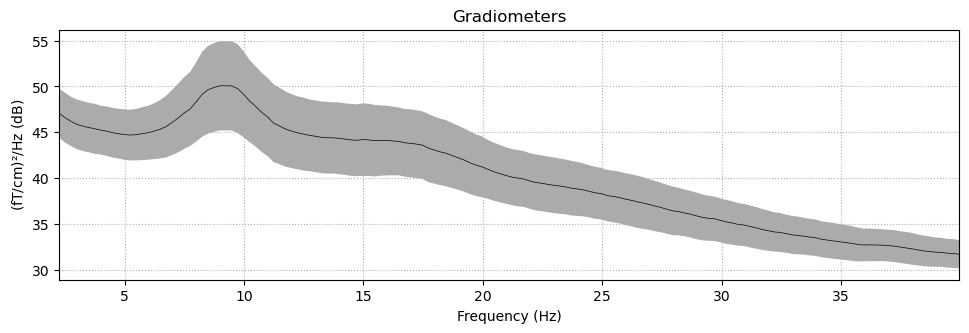

In [26]:
fig = epochs.plot_psd(fmin=2., fmax=40., average=True, spatial_colors=False)

    Using multitaper spectrum estimation with 7 DPSS windows


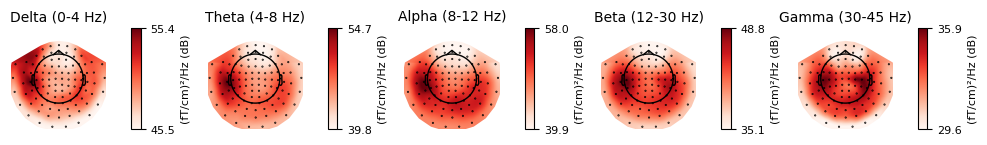

In [27]:
fig = epochs.plot_psd_topomap(ch_type='grad', normalize=False)